In [142]:
from IPython.core.display import display, HTML

display(HTML('''
    <style>
        .output_scroll {
            overflow-x: auto !important;
            overflow-y: visible !important;
            height: auto !important;
            max-height: none !important;
        }
    </style>
'''))

C:\Users\Aditya Rana\AppData\Local\Temp\ipykernel_12512\3943988111.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
df=pd.read_csv("customer_churn.csv")
df.sample(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
101650,104694.0,65.0,Female,58.0,2.0,10.0,27.0,Premium,Monthly,279.00,16.0,1.0
344943,352058.0,42.0,Male,50.0,19.0,2.0,4.0,Standard,Annual,629.86,11.0,0.0
245078,251902.0,51.0,Male,40.0,26.0,4.0,0.0,Basic,Quarterly,339.06,8.0,1.0
33295,33357.0,45.0,Male,40.0,28.0,2.0,27.0,Standard,Annual,892.00,11.0,1.0
265338,272452.0,39.0,Female,25.0,30.0,3.0,3.0,Standard,Annual,500.73,3.0,0.0


In [145]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [146]:
df.shape

(440833, 12)

In [147]:
df['Churn'].nunique()

2

In [148]:
df['Churn'].value_counts() 
# almost balanced

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64

In [149]:
# almost balanced

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [151]:
# drop customer id
df=df.iloc[:,1:12]

In [152]:
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [153]:
for col in df:
    print(col,df[col].nunique())

Age 48
Gender 2
Tenure 60
Usage Frequency 30
Support Calls 11
Payment Delay 31
Subscription Type 3
Contract Length 3
Total Spend 68363
Last Interaction 30
Churn 2


In [154]:
numerical_cols=['Age','Tenure','Usage Frequency','Support Calls','Payment Delay','Total Spend','Last Interaction']
categorical_cols=['Gender','Contract Length','Subscription Type']

In [155]:
df.isnull().sum()

Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [156]:
# only 1 row is missing , so simply drop

In [157]:
null_mask = df.isnull()
rows_with_null = null_mask.any(axis=1)
row_numbers_with_nulls = df[rows_with_null].index  
print(row_numbers_with_nulls)

Index([199295], dtype='int64')


In [158]:
df.iloc[199295]


Age                  NaN
Gender               NaN
Tenure               NaN
Usage Frequency      NaN
Support Calls        NaN
Payment Delay        NaN
Subscription Type    NaN
Contract Length      NaN
Total Spend          NaN
Last Interaction     NaN
Churn                NaN
Name: 199295, dtype: object

In [159]:
df=df.dropna()
df.isnull().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [160]:
df.duplicated().sum()

np.int64(0)

In [161]:
df.info()  # data types are correct

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage Frequency    440832 non-null  float64
 4   Support Calls      440832 non-null  float64
 5   Payment Delay      440832 non-null  float64
 6   Subscription Type  440832 non-null  object 
 7   Contract Length    440832 non-null  object 
 8   Total Spend        440832 non-null  float64
 9   Last Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(8), object(3)
memory usage: 40.4+ MB


# BASIC EDA : NUMERICAL FEATURES

In [162]:
sns.set(style="whitegrid")

In [163]:
def plot_histogram(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

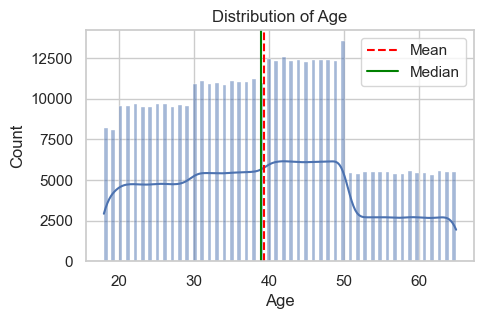

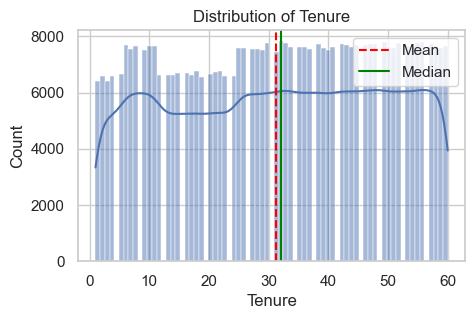

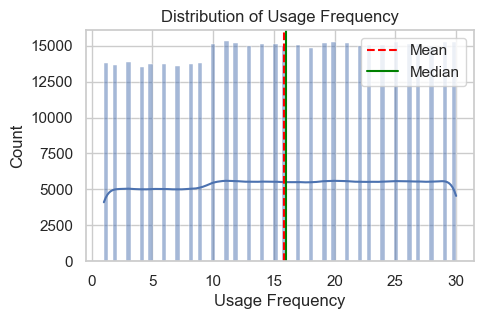

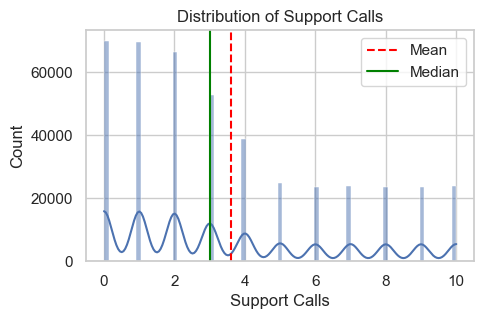

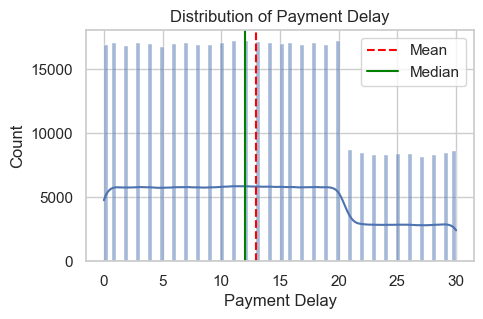

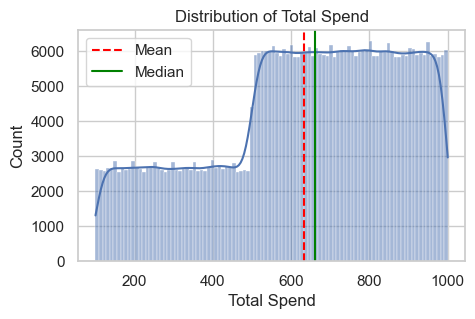

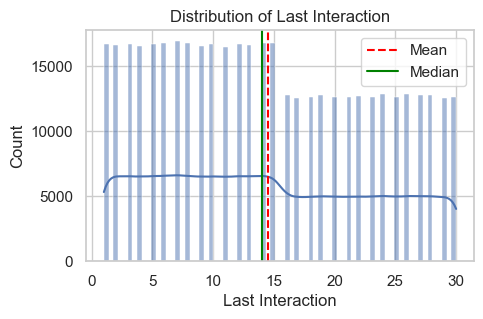

In [164]:
for col in numerical_cols:
    plot_histogram(df,col)
    
    

In [165]:
def plot_boxplot(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show


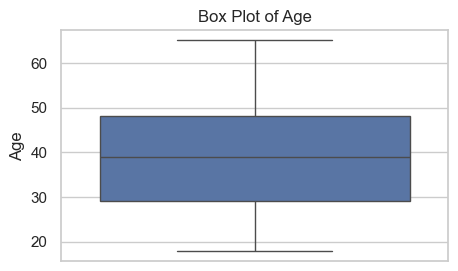

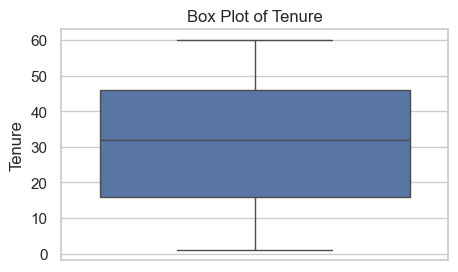

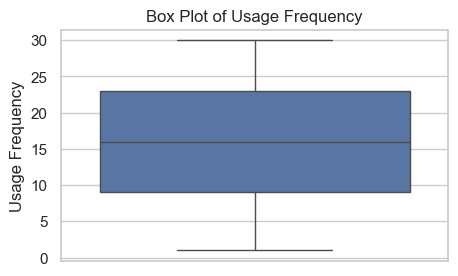

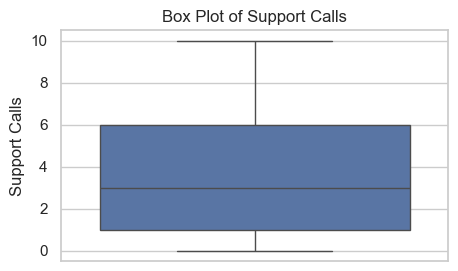

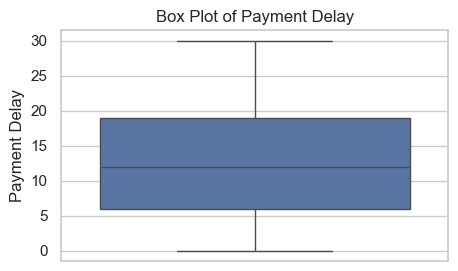

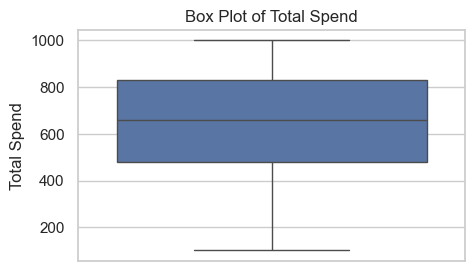

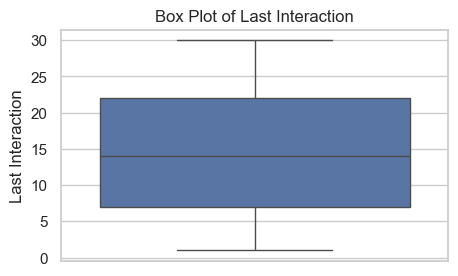

In [166]:
for col in numerical_cols:
    plot_boxplot(df,col)

In [167]:
## no outliers in boxplot

In [168]:
for col in numerical_cols:
     print(f"skew of {col}:",df[col].skew())

skew of Age: 0.16201568056624352
skew of Tenure: -0.061401610125141226
skew of Usage Frequency: -0.04347347834004234
skew of Support Calls: 0.6668085055364663
skew of Payment Delay: 0.2674071254645739
skew of Total Spend: -0.4571740758349857
skew of Last Interaction: 0.17677405050856798


In [169]:
# no need of normalization

In [170]:
temp_numerical=df.iloc[:,[0,2,3,4,5,8,9,10]]


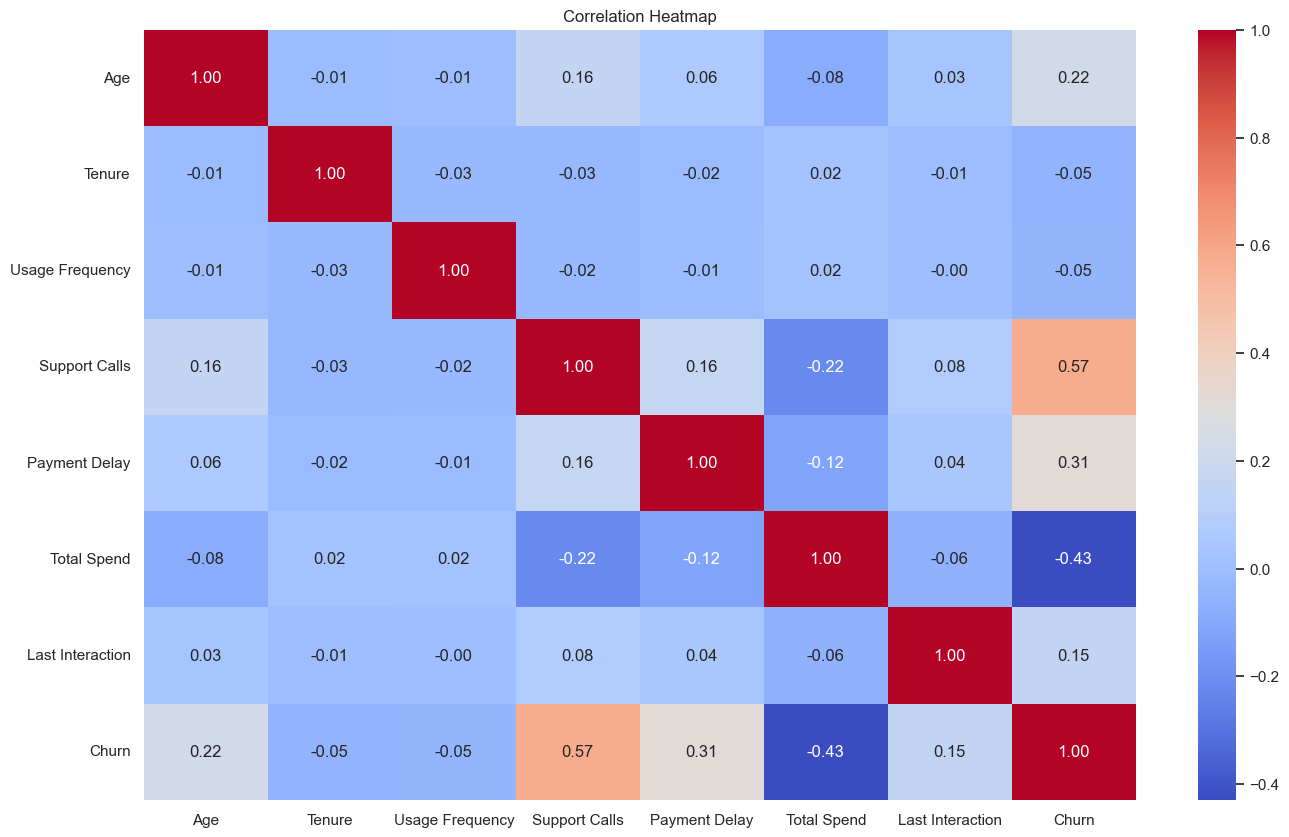

In [171]:
plt.figure(figsize=(16, 10))
sns.heatmap(temp_numerical.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [172]:
# no collinearity > 0.7 for input columns

In [173]:
# however , drop support calls due to more dependence of model on this particular feature might lead to data leakage and overfitting

In [174]:
df=df.drop(['Support Calls'],axis=1)

# CATEGORICAL COLUMNS

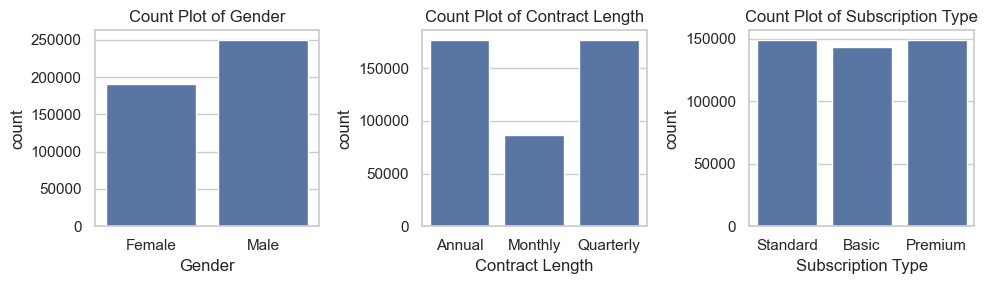

In [175]:
plt.figure(figsize=(10, 3))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage Frequency    440832 non-null  float64
 4   Payment Delay      440832 non-null  float64
 5   Subscription Type  440832 non-null  object 
 6   Contract Length    440832 non-null  object 
 7   Total Spend        440832 non-null  float64
 8   Last Interaction   440832 non-null  float64
 9   Churn              440832 non-null  float64
dtypes: float64(7), object(3)
memory usage: 37.0+ MB


# FEATURE ENGINEERING

In [177]:
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

In [178]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
trf1 = ColumnTransformer([
    ('ohe_encoding', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [1]),
    ('ordinal_encoding', OrdinalEncoder(), [5,6]),
     ],remainder='passthrough')

In [179]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Churn']=le.fit_transform(df['Churn'])

In [180]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler

trf2= ColumnTransformer([
    # Min-Max Scaling (0 to 1)
    ('minmax_scale', MinMaxScaler(), [0, 1,2,3,4,5,6,7,8]),

], remainder='passthrough')

In [181]:
X=df.iloc[:,0:9]
Y=df.iloc[:,-1]

In [182]:
X

,Age,Gender,Tenure,Usage Frequency,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,30.0,Female,39.0,14.0,18.0,Standard,Annual,932.00,17.0
1,65.0,Female,49.0,1.0,8.0,Basic,Monthly,557.00,6.0
2,55.0,Female,14.0,4.0,18.0,Basic,Quarterly,185.00,3.0
3,58.0,Male,38.0,21.0,7.0,Standard,Monthly,396.00,29.0
4,23.0,Male,32.0,20.0,8.0,Basic,Monthly,617.00,20.0
...,...,...,...,...,...,...,...,...,...
440828,42.0,Male,54.0,15.0,3.0,Premium,Annual,716.38,8.0
440829,25.0,Female,8.0,13.0,20.0,Premium,Annual,745.38,2.0
440830,26.0,Male,35.0,27.0,5.0,Standard,Quarterly,977.31,9.0
440831,28.0,Male,55.0,14.0,0.0,Standard,Quarterly,602.55,2.0


In [183]:
Y

0         1
1         1
2         1
3         1
4         1
         ..
440828    0
440829    0
440830    0
440831    0
440832    0
Name: Churn, Length: 440832, dtype: int64

In [184]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [185]:
X_train.shape


(352665, 9)

In [186]:
X_test.shape


(88167, 9)

In [187]:
# SVM
from sklearn.svm import SVC
trf5a= SVC(probability=True, random_state=42)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
trf5b = LogisticRegression(max_iter=1000, random_state=42)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
trf5c = GaussianNB()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
trf5d = RandomForestClassifier(random_state=42)

# XGBoost
from xgboost import XGBClassifier
trf5e= XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')



In [188]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE


pipe1 = make_pipeline(
    trf1,
    trf2,
    trf5e  # classifier
)

In [189]:
pipe1.fit(X_train,Y_train)

C:\Users\Aditya Rana\smote_clean_env\lib\site-packages\xgboost\training.py:183: UserWarning: [17:31:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_encoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1]),
                                                 ('ordinal_encoding',
                                                  OrdinalEncoder(), [5, 6])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmax_scale',
                                                  MinMaxScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7,
                                                   8...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [190]:
pipe2 = make_pipeline(
    trf1,
    trf2,
    trf5d  # classifier
)

In [191]:
pipe2.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_encoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1]),
                                                 ('ordinal_encoding',
                                                  OrdinalEncoder(), [5, 6])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmax_scale',
                                                  MinMaxScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7,
                                                   8])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [192]:
y_pred1 = pipe1.predict(X_train)
y_pred1

array([0, 1, 0, ..., 1, 0, 1])

In [193]:
y_pred2 = pipe2.predict(X_train)
y_pred2

array([0, 1, 0, ..., 1, 1, 1])

In [194]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print(classification_report(Y_train, y_pred1))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95    152770
           1       1.00      0.92      0.96    199895

    accuracy                           0.96    352665
   macro avg       0.95      0.96      0.96    352665
weighted avg       0.96      0.96      0.96    352665



In [196]:
pipe3 = make_pipeline(
    trf1,
    trf2,
    trf5b  # classifier
)

In [197]:
pipe3.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_encoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1]),
                                                 ('ordinal_encoding',
                                                  OrdinalEncoder(), [5, 6])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmax_scale',
                                                  MinMaxScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7,
                                                   8])])),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [198]:
y_pred3 = pipe3.predict(X_train)
y_pred3

array([0, 1, 0, ..., 0, 0, 0])

In [199]:
print(classification_report(Y_train, y_pred3))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71    152770
           1       0.78      0.78      0.78    199895

    accuracy                           0.75    352665
   macro avg       0.75      0.75      0.75    352665
weighted avg       0.75      0.75      0.75    352665



In [200]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_train, y_pred1)
print("Accuracy:", accuracy)

Accuracy: 0.95591283512682


In [201]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_train, y_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.9999801511349298


In [202]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_train, y_pred3)
print("Accuracy:", accuracy)

Accuracy: 0.7529298342619767


In [203]:
# RANDOM FOREST GIVES BEST RESULT : pipe2

### SAVING THE MODEL

In [205]:
import pickle

In [207]:
model_data = {"model": pipe2, "features_names": X_train.columns.tolist()}
# this is a dictionary


with open("churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

In [208]:
# load the saved model and the feature names

with open("churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

In [209]:
print(loaded_model)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_encoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1]),
                                                 ('ordinal_encoding',
                                                  OrdinalEncoder(), [5, 6])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmax_scale',
                                                  MinMaxScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7,
                                                   8])])),
                ('randomforestclassifier',
                 RandomForestClassifier(rand

In [210]:
print(feature_names)

['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction']
